In [1]:
#!pip install natsort
#!pip install seaborn
#!pip install glob2

In [2]:
import pandas as pd
%pylab inline
import seaborn as sns
import glob2
#Trying to work out a safety for natsort
from types import ModuleType
from natsort import natsort as ns
if isinstance(ns, ModuleType):
    natsort = ns.natsorted
else:
    nasort = ns

Populating the interactive namespace from numpy and matplotlib


In [3]:
ls

Untitled.ipynb  pandas_analysis-Copy1.ipynb
analysis.ipynb  pandas_analysis.ipynb


## R

In [4]:
#rdir = '/workspace'
rdir = '../'
dat_files = natsort(glob2.glob(rdir + '/ext_results/results/R4/**/*.dat'))
len(dat_files)
#dat_files

10

In [5]:
columns2 = ['areaintRock', 'tempintRock', 'rmsintRock', 'dwintRock', 'vdintRock', 
            'areaintLith', 'tempintLith','rmsintLith', 'dwintLith', 'vdintLith',
            'areaintLower', 'tempintLower', 'rmsintLower', 'dwintLower', 'vdintLower', 
            'areaintHinge180', 'vdintHinge180', 'areaintHinge60', 'vdintHinge60', 
            'areaintInterface', 'vdintInterface', 'vdintInterface0',
            'rmsSurf', 'nuTop', 'nuBottom', 'plateness', 'subzone',
            'lRidge', 'rRidge', 'realtime']

In [46]:
data = []
realtime = []
gooddata = []
col = 'rmsSurfScaled'

for i in range(len(dat_files)):
    
    try:
        df = pd.read_csv(dat_files[i], sep="\s*", header=None,  index_col=False)
        df.columns = columns2 
        df['rmsSurfScaled'] = (np.sqrt(df['rmsSurf'])/(2900.*1e3/1e-6))*(1e2*3600*24*365)
        df['realtimeScaled'] = (df['realtime']*((2900.*1e3)**2/1e-6))/(1e6*3600*24*365)
        realtime.append(df['realtimeScaled'])
        data.append(df[col])
        gooddata.append(i)
        #print(i)
    except:
        pass
    #    data.append(['NaN']*30)
    #pd.concat(newdf, df.mean())
    #print(df.mean())
    #newdf.loc[i] = df.max()

data = np.array(data)
realtime = np.array(realtime)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


dict_files = natsort(glob2.glob(rdir + '/temp_results/results/R/**/md.pkl'))
import pickle
dicts= []
for df in dict_files:
    with open(df,'rb') as f:
        dicts.append(pickle.load(f))
        
dict_sets = [set(d.iteritems()) for d in dicts]
diff_keys = [i[0] for i in set.difference(dict_sets[0], set.intersection(*map(set,dict_sets)))]

clean_dicts = []
for adict in dicts:
    red_dict= dict((k,adict[k]) for k in diff_keys if k in adict)
    clean_dicts.append(red_dict)
    
    
params = pd.DataFrame(clean_dicts)
#newdf = newdf.join(params)

In [47]:
[i + 1 for i in gooddata]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [48]:
data.shape

(10,)

In [49]:
import numpy as np
params = []
counter = 1
for a in [128, 160, 192, 256, 320]:
    for b in ["Q1/dQ0", "Q2/DPC1"]:
        params.append([a,b, counter])
        counter +=1
params = np.array(params)[gooddata]
#params = np.array(params)

print(len(params))
#params[25]

10


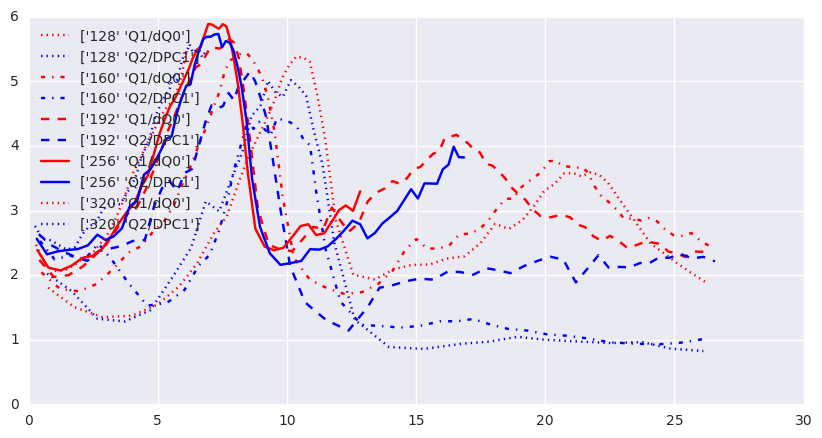

In [50]:
fig, ax = plt.subplots(figsize=(10,5))



for i in range(0, realtime.shape[0]):
        #print(i, gooddata[i])
        if params[i][0] == '128':
            ls = ':'
        if params[i][0] == '160':
            ls = '-.'
        elif params[i][0] == '192':
            ls = '--'
        elif params[i][0] == '256':
            ls = '-'
        elif params[i][0] == '320':
            ls = ':'    
        if params[i][1] == 'Q1/dQ0':
            c = 'r'
            
        else:
            c   = 'b'
            
        ax.plot(realtime[i], data[i], c=c, linestyle=ls, label=str((params[i][[0,1]])) )

#ax.set_xlim(0., 0.00012)
#ax.set_ylim(-0.7, 0.7)
ax.legend(loc=2)


Note the resoltion for the q2 models is half the recoded. 256 => 128.  


    

In [36]:
for d in data:
    print(d.min())

758753.257118
607484.613128
1731878.05128
1772959.67385
3569966.93269
1740967.49861
9862714.8545
3836503.41016
12016660.7403
17005597.8965


In [14]:
df['rmsSurfScaled']

0      700.380478
1      598.516351
2      593.246532
3      559.378647
4      526.934478
5      545.312533
6      638.173362
7      699.730716
8      728.269692
9      832.970629
10     886.640328
11     885.652420
12     881.706543
13     966.329094
14    1053.209946
15    1163.656513
16    1339.842602
17    1463.475925
18    1596.558646
19    1806.944194
20    1930.250115
21    2029.291217
22    2126.271938
23    2203.490865
24    2403.608504
25    2316.206053
26    2494.006624
27    2667.999719
28    2719.886217
29    2857.695749
30    2726.313822
31    2764.459995
32    2774.140959
33    2656.550040
34    2734.307065
Name: rmsSurfScaled, dtype: float64